In [22]:
import pandas as pd
import numpy as np
audata = pd.read_csv("RESULT_ALL/al/al2101_al2102_final.csv", index_col=[0], parse_dates=[0])
audata['trading_date'] = pd.to_datetime(audata['trading_date'])
audata

,id_A,ask_A,ask_vol_A,bid_A,bid_vol_A,last_A,id_B,ask_B,ask_vol_B,bid_B,bid_vol_B,last_B,spd_ask,spd_bid,spd_last,trading_date
date_time,,,,,,,,,,,,,,,,
2020-11-06 20:59:00,al2101,14665.0,18.0,14660.0,5.0,14660.0,al2102,14495.0,6.0,14485.0,32.0,14495.0,175.0,170.0,165.0,2020-11-09
2020-11-06 21:00:00,al2101,14695.0,27.0,14685.0,24.0,14695.0,al2102,14520.0,8.0,14515.0,4.0,14515.0,170.0,175.0,180.0,2020-11-09
2020-11-06 21:01:00,al2101,14715.0,44.0,14710.0,16.0,14710.0,al2102,14540.0,64.0,14530.0,8.0,14535.0,180.0,175.0,175.0,2020-11-09
2020-11-06 21:02:00,al2101,14730.0,18.0,14725.0,12.0,14725.0,al2102,14550.0,5.0,14545.0,25.0,14545.0,180.0,180.0,180.0,2020-11-09
2020-11-06 21:03:00,al2101,14710.0,31.0,14705.0,18.0,14705.0,al2102,14530.0,1.0,14525.0,10.0,14525.0,180.0,180.0,180.0,2020-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15 14:56:00,al2101,14980.0,5.0,14920.0,60.0,14920.0,al2102,14910.0,6.0,14905.0,27.0,14905.0,15.0,70.0,15.0,2021-01-15
2021-01-15 14:57:00,al2101,14980.0,5.0,14920.0,10.0,14920.0,al2102,14895.0,1.0,14890.0,22.0,14895.0,30.0,85.0,25.0,2021-01-15
2021-01-15 14:58:00,al2101,14980.0,5.0,14920.0,10.0,14920.0,al2102,14900.0,69.0,14895.0,1.0,14895.0,25.0,80.0,25.0,2021-01-15


In [23]:
import datetime
start_date = datetime.datetime(2020, 11, 10)
end_date = datetime.datetime(2020, 12, 31)
data_all = audata.loc[audata.trading_date >= start_date]
data_all = data_all.loc[data_all.trading_date < end_date]

#删除为0的行，排除涨跌停导致价格为0
data_all.drop( index = data_all.ask_A[data_all.ask_A == 0].index,inplace = True)
data_all.drop( index = data_all.bid_A[data_all.bid_A == 0].index,inplace = True)
data_all.drop( index = data_all.ask_B[data_all.ask_B == 0].index,inplace = True)
data_all.drop( index = data_all.bid_B[data_all.bid_B == 0].index,inplace = True)

#获取到交易日，后面根据交易日做循环
pd_date_list = pd.DataFrame()
pd_date_list['time_stamp'] = data_all['trading_date']
# normalize, count values, convert to dataframe
pd_date_list = pd_date_list['time_stamp'].dt.normalize().value_counts().to_frame().reset_index()
# rename columns
pd_date_list.columns = ['time_stamp', 'count']
pd_date_list.sort_values(by='time_stamp',inplace=True)
pd_date_list = pd_date_list.reset_index()
pd_date_list.drop(columns='index',inplace=True)
pd_date_list


,time_stamp,count
0,2020-11-10,470
1,2020-11-11,470
2,2020-11-12,470
3,2020-11-13,470
4,2020-11-16,470
5,2020-11-17,470
6,2020-11-18,470
7,2020-11-19,470
8,2020-11-20,470
9,2020-11-23,470


In [42]:
import statsmodels.api as sm
import datetime
holding = False
direction = None  # "a-b", "b-a"
stop_event = "none"
enter_record = []
out_record = []
trading_date_in = ""

pure_pnl = []
trading_cost = []
pnl = []
cost_rate = 0.5 / 10000
delta_days = 1
K = 0
beta = 0
# data_all['trading_date']  =  pd.to_datetime(data_all['trading_date']) #处理交易日时刻
#取最近5天数据
for date_index in range(0,len(pd_date_list) - delta_days):

    #根据日期获取拟合数据
    start_time = pd_date_list['time_stamp'].iloc[date_index]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]
    #使用数据的成交价拟合beta
    model = sm.OLS(data.last_A, data.last_B).fit()
    beta = model.params['last_B']
    eps = data.last_A - data.last_B * beta #生成拟合后数据

    #根据日期获取交易数据       
    start_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]  + pd.Timedelta("1 day")
    test_data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

    #根据beta生产对手价的ask和bid序列
    eps2_ask = test_data.bid_A - test_data.ask_B * beta
    eps2_bid = test_data.ask_A - test_data.bid_B * beta
    #生成实际的成交的ask和bid价格（由于实际交易都是1:1）
    Spread2_ask = test_data.bid_A - test_data.ask_B
    Spread2_bid = test_data.ask_A - test_data.bid_B

    print(" ")
    print('test_day:',start_time)
    print(model.params)

    #进入交易
    #生成交易信号阈值
    K = 0.5
    up_threshold =  K * np.std(eps)
    # up_threshold = 4
    down_threshold = - up_threshold

    #生成止损信号阈值
    up_threshold_stop = np.std(eps) * 20
    down_threshold_stop = -up_threshold_stop
    #生成最大亏损信号阈值
    biggest_lost = -100

    #生成平仓信号阈值
    up_close_threshold = up_threshold - 4
    down_close_threshold = down_threshold + 4

    print('beta:',beta)
    print('阈值：',up_threshold)
    print('止损点：',up_threshold_stop)

    #遍历数据判断交易
    for i, v in enumerate(eps2_ask.values):
        #交易时间点判断:去除开盘前10分钟和收盘前十分钟
        start_time1 = datetime.time(21,10,0) #夜盘开盘
        start_time2 = datetime.time(9,10,0) #早上开盘

        end_time1 = datetime.time(0,50,0) #夜盘收盘
        end_time2 = datetime.time(14,50,0) #下午收盘
        #判断是否在我们规定交易时段
        if (eps2_ask.index[i].time() > start_time1 or eps2_ask.index[i].time() < end_time1) or \
            (eps2_ask.index[i].time() > start_time2 and eps2_ask.index[i].time() < end_time2):

            ask_price = eps2_ask[i] #获取价格
            bid_price = eps2_bid[i]
            if not holding:
                # 判断进场条件
                if ask_price > up_threshold and stop_event != 'up_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'b-a'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'b-a进场', Spread2_ask[i], ask_price,'--',len(enter_record))
                    #记录进出场信息
                    enter_record.append((Spread2_ask[i], ask_price,test_data.index[i],direction))
                elif bid_price < down_threshold and stop_event != 'down_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'a-b'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'a-b进场', Spread2_bid[i], bid_price,'--',len(enter_record))
                    enter_record.append((Spread2_bid[i], bid_price,test_data.index[i],direction))
                    
            elif holding:
                # 判断离场条件
                if direction == 'a-b' and ask_price > down_close_threshold:
                    holding = False
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price < up_close_threshold:
                    holding = False
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2       
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'b-a出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)

                #判断止损条件
                elif direction == 'a-b' and ask_price < down_threshold_stop:
                    holding = False
                    stop_event = 'down_stop'               
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price > up_threshold_stop:
                    holding = False
                    stop_event = 'up_stop'
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2        
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    print(test_data.index[i],'b-a止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                    out_record.append(( Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                else: #判断最大亏损有没有达到阈值
                    if direction == 'a-b':
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'down_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'a-b收益止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                            out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    elif direction =='b-a':
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'up_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2         
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'b-a收益止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                            out_record.append((Spread2_bid[i], bid_price, test_data.index[i],single_ret,single_cost))

            
if holding:
    if direction == 'a-b':
        single_ret = (Spread2_ask[-1] - enter_record[-1][0])
    else:
        single_ret = (enter_record[-1][0] - Spread2_bid[-1])
    
    if trading_date_in == test_data.trading_date[i]:
        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
    else:
        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 
    pure_pnl.append(single_ret)
    trading_cost.append(single_cost)
    pnl.append(single_ret - single_cost)

    out_record.append((Spread2_ask[i], ask_price, test_data.index[i],single_ret,single_cost))
    print('还有持仓，强平',Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)

#做汇总处理，生成交易日志和结果。
df_record = pd.DataFrame()
index_list = []
direction_list = []
in_out_price = []
in_out_eps_price = []
ret_list = []
cost_list = []
pure_ret_list = []
for j in range(0,len(enter_record)):
    #更新index
    index_list.append(enter_record[j][2])
    index_list.append(out_record[j][2])
    #更新方向：
    direction_list.append(enter_record[j][3] + ' in')
    direction_list.append(enter_record[j][3] + ' out')
    #更新进出场价格-原始和eps
    in_out_price.append(enter_record[j][0])
    in_out_price.append(out_record[j][0])

    in_out_eps_price.append(enter_record[j][1])
    in_out_eps_price.append(out_record[j][1])

    #更新成本和收益
    pure_ret_list.append(0) #进场为0
    pure_ret_list.append(out_record[j][3]) #出场记录

    cost_list.append(0) #进场为0
    cost_list.append(out_record[j][4]) #出场记录

    ret_list.append(0) #进场为0
    ret_list.append(out_record[j][3] - out_record[j][4]) #出场记录

#转换为datafram
df_record = data_all.loc[index_list]
df_record['trading_direction'] = direction_list
df_record['in_out_price'] = in_out_price
df_record['in_out_eps_price'] = in_out_eps_price
df_record['pure_return'] = ret_list
df_record['trading cost'] = cost_list
df_record['final return'] = pure_ret_list


 
test_day: 2020-11-11 00:00:00
last_B    1.012421
dtype: float64
beta: 1.0124209609200787
阈值： 2.985406047197414
止损点： 119.41624188789658
2020-11-11 09:16:00 b-a进场 185.0 3.2192369346485066 -- 0
 
test_day: 2020-11-12 00:00:00
last_B    1.012974
dtype: float64
beta: 1.0129736707159815
阈值： 4.353552015793447
止损点： 174.14208063173788
 
test_day: 2020-11-13 00:00:00
last_B    1.013778
dtype: float64
beta: 1.0137780601553574
阈值： 2.3216794866010817
止损点： 92.86717946404326
2020-11-12 21:11:00 b-a出场 205.0 -0.4997672171557497 ret: -23.0035
2020-11-12 22:37:00 b-a进场 210.0 3.7424394742993172 -- 1
 
test_day: 2020-11-16 00:00:00
last_B    1.014224
dtype: float64
beta: 1.0142241192528922
阈值： 3.512517014350858
止损点： 140.50068057403433
2020-11-13 21:34:00 b-a出场 210.0 -3.717391774705902 ret: -3.0260000000000002
2020-11-13 21:35:00 a-b进场 210.0 -3.6462711784406565 -- 2
 
test_day: 2020-11-17 00:00:00
last_B    1.013843
dtype: float64
beta: 1.0138429705986316
阈值： 3.3206118743247557
止损点： 132.82447497299023
 
t

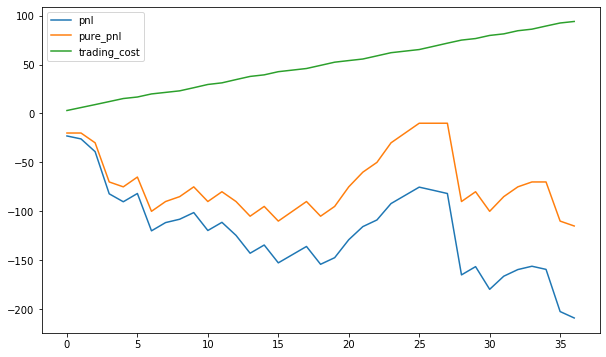

-208.98900000000003

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(np.array(pnl).cumsum(), label='pnl')
plt.plot(np.array(pure_pnl).cumsum(), label='pure_pnl')
plt.plot(np.array(trading_cost).cumsum(), label='trading_cost')
plt.legend()
plt.show()
np.array(pnl).sum()